# Machine Learning - Text Processing
## Application of text data processing and supervised classification

### Read Data

In [182]:
import numpy as np
import pandas as pd

In [183]:
df = pd.read_csv('/Users/eve7947/Side_Projects/Fundrazr_Text_Classifier/Fundrazr_Business.csv')
df.head()

,amountRaised,campaignTitle,currencyType,endDate,goal,numberContributors,percentage,story,url
0,300,Help us purchase a new server,U.S. Dollar,NaN,of $1k goal,5.0,30%,NaN,https://fundrazr.com/211XNb
1,"1,000",Please Help Us Return Home to France to Mentor...,Canadian Dollar,NaN,of $10k goal,4.0,10%,I am a native-born Californian with French fam...,https://fundrazr.com/d1TPif
2,"1,110",ENVIRONS - Eco-Friendly Shoe.,U.S. Dollar,"Jun 1, 2019",of $30k goal,2.0,4%,The Environs shoes made by Australian Merino\n...,https://fundrazr.com/environs_
3,180,Introducing Aquaponics into the Greek market,Euro,NaN,of €2k goal,7.0,9%,"Hi, my name is Nicolas Bagkos and I come from ...",https://fundrazr.com/31DJF6
4,"7,274",Self Serve Classroom and Expansion!,U.S. Dollar,NaN,of $15k goal,82.0,48%,Dear supporters of Self Serve We’re excited to...,https://fundrazr.com/selfserveclassroom


In [184]:
df.shape

(547, 9)

In [185]:
df.drop(['campaignTitle', 'currencyType', 'endDate', 'goal', 'url'], axis=1, inplace=True)

### Text Data Processing

In [186]:
df = df.dropna(subset=['story','percentage'])

In [187]:
df.dtypes

amountRaised           object
numberContributors    float64
percentage             object
story                  object
dtype: object

In [188]:
df.story.head()

1    I am a native-born Californian with French fam...
2    The Environs shoes made by Australian Merino\n...
3    Hi, my name is Nicolas Bagkos and I come from ...
4    Dear supporters of Self Serve We’re excited to...
5    Carey Allan is a local pottery artist, mother,...
Name: story, dtype: object

In [189]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [190]:
story = df.story.str.cat(sep=' ')

In [191]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(story)
#print(words)

In [192]:
print(len(words))

203481


In [14]:
words_v2 = word_tokenize(story)
#print(words_v2)

In [69]:
frequency_dist = nltk.FreqDist(words)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

['the', 'to', 'and', 'a', 'of', 'I', 'in', 'for', 'is', 'that']

In [193]:
stop_words = set(stopwords.words('english'))
valued_words = [w for w in words if not w in stop_words]
#print(valued_words)

In [194]:
frequency_dist = nltk.FreqDist(valued_words)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

['I', 'The', 'help', 'We', 'business', 'people', 'us', 'time', 'one', 'need']

In [195]:
words_lower = [x.lower() for x in words]
valued_words = [w for w in words_lower if not w in stop_words]
#print(valued_words)

In [196]:
frequency_dist = nltk.FreqDist(valued_words)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

['help',
 'business',
 'people',
 'us',
 'one',
 'need',
 'time',
 'get',
 'would',
 'new']

In [197]:
print(len(valued_words))

112187


In [20]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stems_words = []
for w in valued_words:    
    stems_words.append(porter.stem(w))
#print(stems_words)

In [21]:
frequency_dist_v2 = nltk.FreqDist(stems_words)
sorted(frequency_dist_v2,key=frequency_dist_v2.__getitem__, reverse=True)[0:10]

['help', 'busi', 'need', 'year', 'work', 'make', 'time', 'get', 'one', 'peopl']

### Feature Extraction

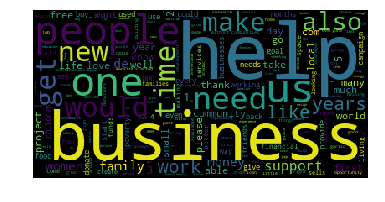

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Generate lables of sucess/failed campaign

In [198]:
df.percentage = df.percentage.str.rstrip('%').astype('float') / 100

In [199]:
df.percentage.dtype

dtype('float64')

In [200]:
df['success'] = np.where(df['percentage'] > 0.5, 1, 0)

In [201]:
df.success.value_counts()

0    372
1    120
Name: success, dtype: int64

In [202]:
df['clean'] = df['story'].str.lower().apply(tokenizer.tokenize)

In [203]:
def process(x):
    x = [w for w in x if not w in stop_words]
    return' '.join(x)

In [204]:
df['clean'] = df['clean'].apply(process)

In [205]:
df.head()

,amountRaised,numberContributors,percentage,story,success,clean
1,"1,000",4.0,0.10,I am a native-born Californian with French fam...,0,native born californian french family heritage...
2,"1,110",2.0,0.04,The Environs shoes made by Australian Merino\n...,0,environs shoes made australian merino wool per...
3,180,7.0,0.09,"Hi, my name is Nicolas Bagkos and I come from ...",0,hi name nicolas bagkos come greece difficult t...
4,"7,274",82.0,0.48,Dear supporters of Self Serve We’re excited to...,0,dear supporters self serve excited announce gr...
5,"4,165",30.0,0.42,"Carey Allan is a local pottery artist, mother,...",0,carey allan local pottery artist mother roller...


In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(binary=True).fit(df.clean.values)
X_train_vectorized = vect.transform(df.clean.values).astype('float')

In [207]:
y_train = df.success.values

### Modeling -Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_train , random_state = 0)
clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train)
clf1.score(X_test, y_test)

/Users/eve7947/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7967479674796748

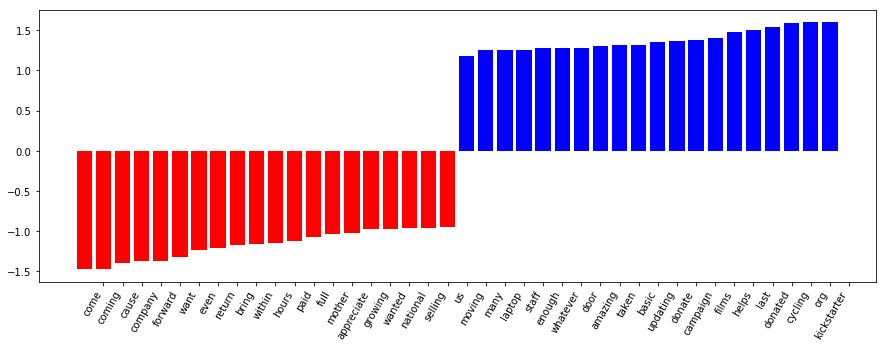

In [209]:
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

plot_coefficients(clf1, vect.get_feature_names())

### Modeling - SVC

In [212]:
from sklearn.svm import SVC
clf2 = SVC(C=100,gamma=1,kernel='rbf',probability=True)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.8048780487804879

In [216]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.2.


In [118]:
y_pred = clf2.predict(X_test)

In [120]:
import pickle
with open('fundrazr.clf2.pkl', 'wb') as file:
    pickle.dump(clf2, file)

In [211]:
with open('vect.pkl', 'wb') as file:
    pickle.dump(vect, file)